CHAPTER 08 이미지를 위한 인공 신경망  
8-2 합성곱 신경망을 사용한 이미지 분류

In [9]:
# 패션 MNIST 데이터 불러오기
import keras
from sklearn.model_selection import train_test_split
(train_input, train_target), (test_input, test_target) =\
    keras.datasets.fashion_mnist.load_data()
train_scaled = train_input.reshape(-1,28,28,1) / 255.0 # 깊이 보정
train_scaled, val_scaled, train_target, val_target = train_test_split(
    train_scaled, train_target, test_size=0.2, random_state=42
)

In [10]:
# 합성곱 신경망 만들기
model = keras.Sequential()
model.add(keras.layers.Input(shape=(28,28,1)))
model.add(keras.layers.Conv2D(32, kernel_size=3, activation='relu', padding='same')) # 32개 필터, 커널 크기 (3,3), 렐루 활성화 함수, 세임 패딩 사용

W0000 00:00:1763900530.983199   14539 gpu_device.cc:2344] Cannot dlopen some GPU libraries. Please make sure the missing libraries mentioned above are installed properly if you would like to use GPU. Follow the guide at https://www.tensorflow.org/install/gpu for how to download and setup the required libraries for your platform.
Skipping registering GPU devices...


In [11]:
# 풀링 층 추가
model.add(keras.layers.MaxPooling2D(2)) # 풀링 크기 (2,2)

패션 MNIST 이미지 (28,28) 크기에 세임 패딩 적용 = (28,28)    
(2,2) 풀링 적용 > 특성 맵의 크기는 절반으로 줄어들고, 32개 필터 사용했으므로 깊이는 32가 됨 = (14,14,32)  

In [12]:
# 두 번째 합성곱-풀링 층 추가
model.add(keras.layers.Conv2D(64, kernel_size=3, activation='relu', padding='same')) # 64개 필터
model.add(keras.layers.MaxPooling2D(2))

(14,14)에 세임 패딩 적용 = (14,14)
(2,2) 풀링 적용 > 특성 맵의 크기 = (7,7,64)

In [13]:
# 3차원 특성 맵을 일렬로 펼침
# 밀집 출력층에서 확률을 계산하기 위함
model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(100,activation='relu')) # 은닉층
model.add(keras.layers.Dropout(0.4)) # 드롭아웃으로 은닉층의 과대적합 방지
model.add(keras.layers.Dense(10, activation='softmax')) # 출력층(다중분류=소프트맥스)

model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 28, 28, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 14, 14, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 14, 14, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 7, 7, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 3136)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 100)            │       313,700 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 100)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │         1,010 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 333,526 (1.27 MB)

 Trainable params: 333,526 (1.27 MB)

 Non-trainable params: 0 (0.00 B)

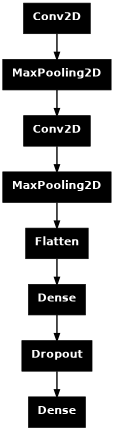

In [16]:
from keras.utils import plot_model
plot_model(model,dpi=50)

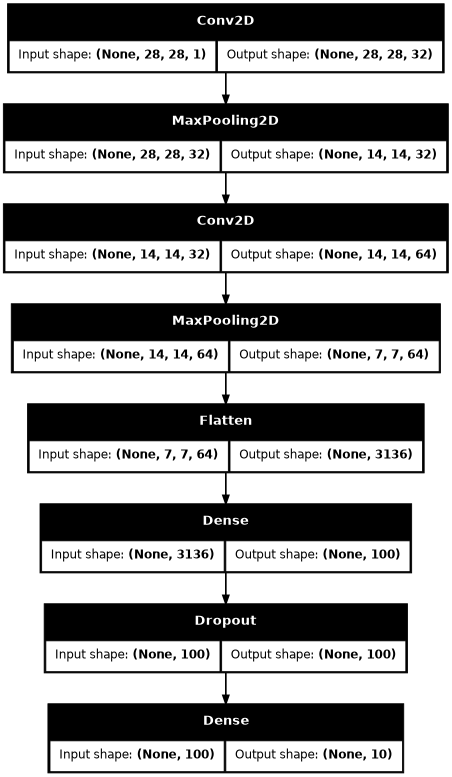

In [17]:
# 입출력 함께 표시
plot_model(model, show_shapes=True, dpi=60)

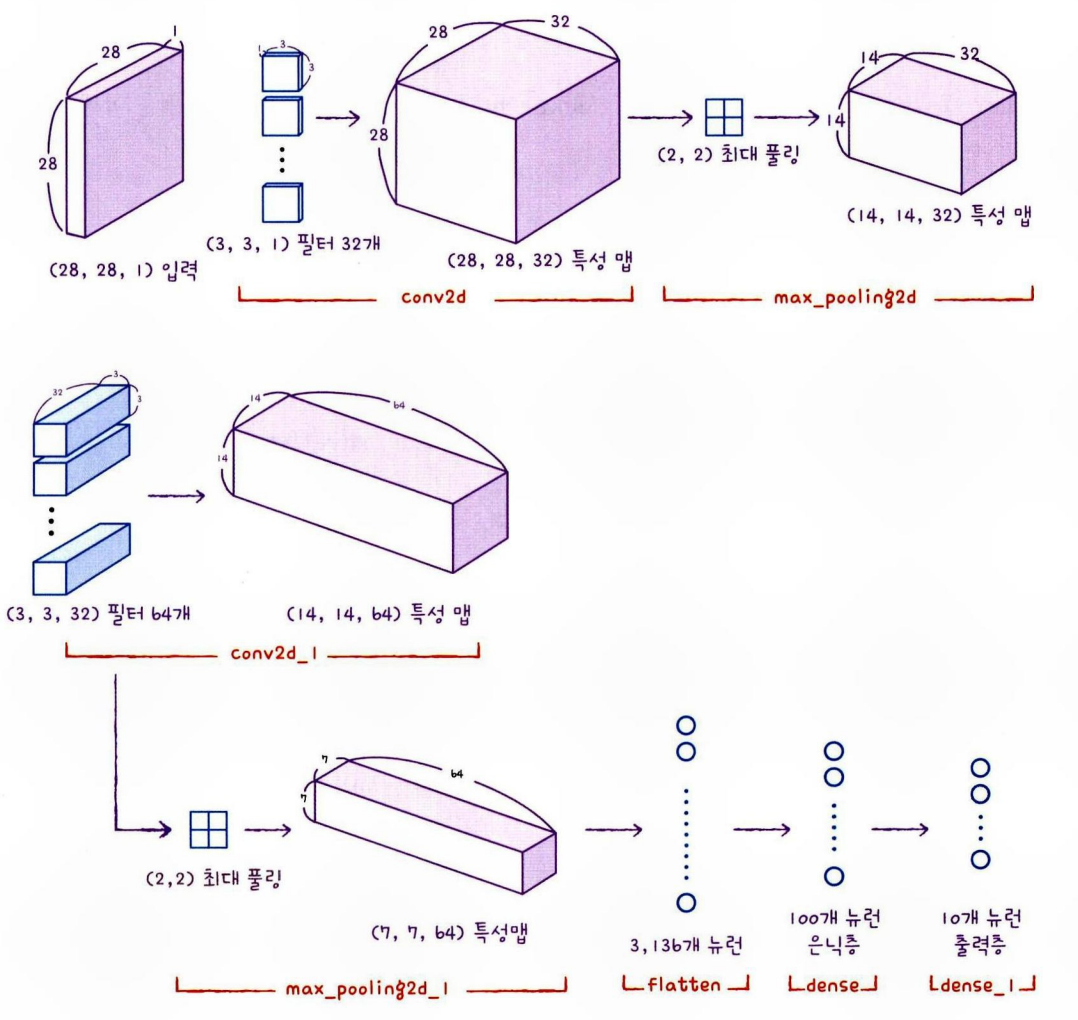

In [18]:
# 모델 컴파일과 훈련
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy',metrics=['accuracy'])
checkpoint_cb = keras.callbacks.ModelCheckpoint('best-cnn-model.keras', save_best_only=True)
early_stopping_cb = keras.callbacks.EarlyStopping(patience=2, restore_best_weights=True) # 조기종료
history = model.fit(train_scaled, train_target, epochs=20, validation_data=(val_scaled, val_target), callbacks=[checkpoint_cb, early_stopping_cb])

Epoch 1/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 16s 10ms/step - accuracy: 0.7315 - loss: 0.7403 - val_accuracy: 0.8797 - val_loss: 0.3266
Epoch 2/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 17s 11ms/step - accuracy: 0.8697 - loss: 0.3608 - val_accuracy: 0.9000 - val_loss: 0.2729
Epoch 3/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 16s 11ms/step - accuracy: 0.8923 - loss: 0.3001 - val_accuracy: 0.9060 - val_loss: 0.2607
Epoch 4/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 18s 12ms/step - accuracy: 0.9044 - loss: 0.2632 - val_accuracy: 0.9086 - val_loss: 0.2456
Epoch 5/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 16s 11ms/step - accuracy: 0.9137 - loss: 0.2403 - val_accuracy: 0.9143 - val_loss: 0.2324
Epoch 6/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 17s 12ms/step - accuracy: 0.9202 - loss: 0.2173 - val_accuracy: 0.9212 - val_loss: 0.2221
Epoch 7/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 15s 10ms/step - accuracy: 0.9258 - loss: 0.1989 - val_accuracy: 0.9159 - val_loss: 0.2312
Epoch 8/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 18s 12ms/step - accuracy: 0.9337 -

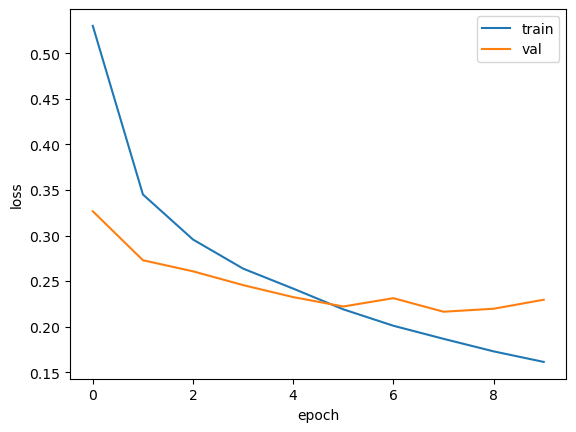

In [19]:
import matplotlib.pyplot as plt

plt.plot(history.history['loss'],label='train')
plt.plot(history.history['val_loss'], label='val')
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend()
plt.show()

EarlyStopping 클래스에서 restore_best_weights 매개변수를 True로 지정했으므로  
현재 model 객체가 최적의 모델 파라미터로 복원됨  

In [20]:
# 성능 평가
model.evaluate(val_scaled, val_target)

375/375 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.9276 - loss: 0.2093


[0.21635255217552185, 0.9246666431427002]

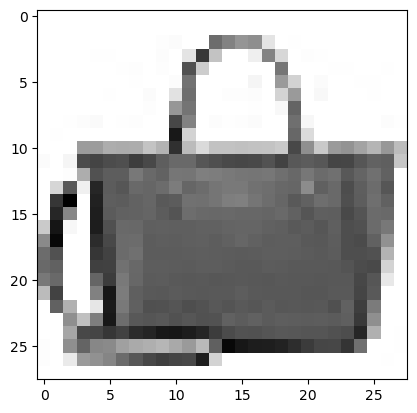

In [21]:
# 새로운 데이터에 대한 예측
plt.imshow(val_scaled[0].reshape(28,28), cmap='gray_r') # 맷플롯립은 흑백 이미지에 깊이 차원이 없으므로 2차원으로 변환
plt.show()

In [22]:
# 10개의 클래스에 대한 예측 확률
preds = model.predict(val_scaled[0:1])
print(preds)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 92ms/step
[[4.0744086e-20 1.4412901e-32 9.1602173e-24 2.7184267e-23 3.0318667e-19
  1.2751531e-20 2.1369067e-19 7.4725122e-21 1.0000000e+00 1.8942905e-21]]


[슬라이싱 사용 이유]  
배열 슬라이싱은 선택된 원소가 하나이더라도 전체 차원이 유지됨 = (1, 28, 28, 1)  

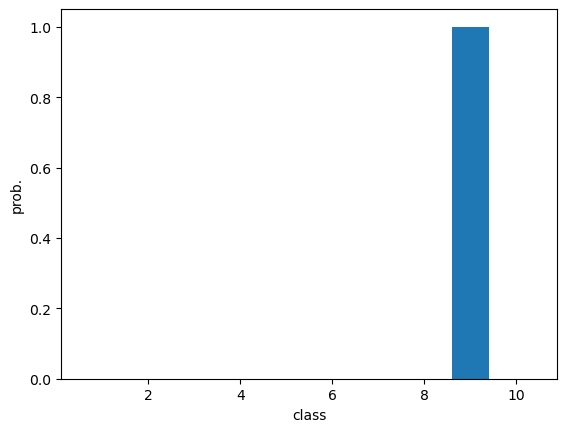

In [23]:
plt.bar(range(1,11), preds[0])
plt.xlabel('class')
plt.ylabel('prob.')
plt.show()

In [ ]:
# 패션 MNIST 데이터셋의 레이블을 리스트로 저장
classes = ['티셔츠','바지','스웨터','드레스','코트','샌달','셔츠','스니커즈','가방','앵클 부츠']

In [25]:
import numpy as np

# preds 배열에서 가장 큰 인덱스를 찾아 classes 리스트의 인덱스로 사용
print(classes[np.argmax(preds)])

가방


In [27]:
# 테스트 세트 변환
test_scaled = test_input.reshape(-1, 28, 28, 1) / 255.0

# 테스트 세트 성능 측정
model.evaluate(test_scaled, test_target)

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.9158 - loss: 0.2525


[0.23826472461223602, 0.917900025844574]